## Customer Lifetime Value

Using the following equation to calculate CLTV


CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.


## Problem Statement 1: Predicting Customer Lifetime Value (CLV) for E-commerce
The task is to build a machine learning model to predict the Customer Lifetime Value (CLV) for an e-commerce platform. CLV represents the total revenue a customer is expected to generate over a specific period, and predicting this value accurately helps businesses make data-driven decisions on marketing strategies, customer retention, and resource allocation.
The dataset includes customer demographics (age, income, location), behavior data (website visits, purchases, session duration), transactional history (total spend, frequency of purchases), engagement metrics (email open rate, support interactions), and external factors (seasonality, economic indicators).
The goal is to build to predict the CLV.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,384.811147,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,1131.464935,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,566.472247,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,529.881344,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,138.130879,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9084 entries, 0 to 9083
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9084 non-null   float64
 1   Response                       9084 non-null   object 
 2   Coverage                       9084 non-null   object 
 3   Education                      9084 non-null   object 
 4   EmploymentStatus               9084 non-null   object 
 5   Gender                         9084 non-null   object 
 6   Income                         9084 non-null   int64  
 7   Location Code                  9084 non-null   object 
 8   Marital Status                 9084 non-null   object 
 9   Monthly Premium Auto           9084 non-null   int64  
 10  Months Since Last Claim        9084 non-null   int64  
 11  Months Since Policy Inception  9084 non-null   int64  
 12  Number of Open Complaints      9084 non-null   i

### Description about Dataset
The dataset consists of information on customer lifetime value of an auto insurance company in the United States. It contains 9134 records of individuals residing in various states across the US. It also includes over 16 features, encompassing of both personal information and details related to their auto insurance.

In [4]:
df.shape

(9084, 16)

In [5]:
print('The number of rows: ', df.shape[0])
print('The number of Columns: ', df.shape[1])

The number of rows:  9084
The number of Columns:  16


**Checking the null values**

In [6]:
df.isnull().sum()

Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
Vehicle Size                     0
dtype: int64

**Checking the numerical values**

now i will select the columns containing numerical values. i will also drop the columns containing no.of policies and Number of Open Complaints because they does not add much value.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9084 entries, 0 to 9083
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9084 non-null   float64
 1   Response                       9084 non-null   object 
 2   Coverage                       9084 non-null   object 
 3   Education                      9084 non-null   object 
 4   EmploymentStatus               9084 non-null   object 
 5   Gender                         9084 non-null   object 
 6   Income                         9084 non-null   int64  
 7   Location Code                  9084 non-null   object 
 8   Marital Status                 9084 non-null   object 
 9   Monthly Premium Auto           9084 non-null   int64  
 10  Months Since Last Claim        9084 non-null   int64  
 11  Months Since Policy Inception  9084 non-null   int64  
 12  Number of Open Complaints      9084 non-null   i

In [8]:
num_col = df.select_dtypes(include=['int64', 'float64'])
num_col = num_col.drop(['Number of Policies', 'Number of Open Complaints'], axis=1)
num_col.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000
mean,8000.064839,37670.477653,93.210920,15.096543,48.044033,434.217194
std,6868.143013,30383.716167,34.397124,10.068631,27.914400,290.578027
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3996.418672,0.000000,68.000000,6.000000,24.000000,272.340392
50%,5780.182197,33899.000000,83.000000,14.000000,48.000000,383.945434
75%,8941.856808,62344.750000,109.000000,23.000000,71.000000,547.692983
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


## Exploratory Data Analysis

**Target Value Analysis**

Customer lifetime value is our target variable as we aim to predict it.

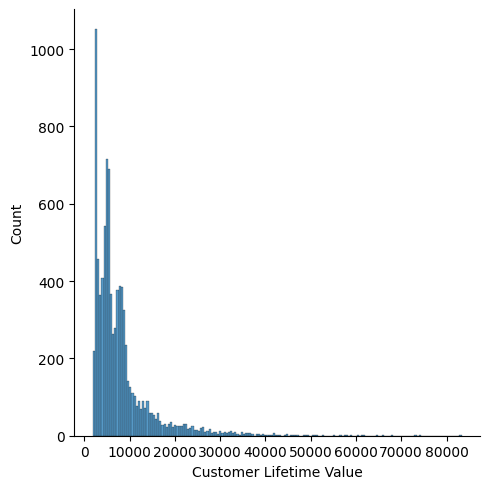

In [9]:
sns.displot(df['Customer Lifetime Value'])

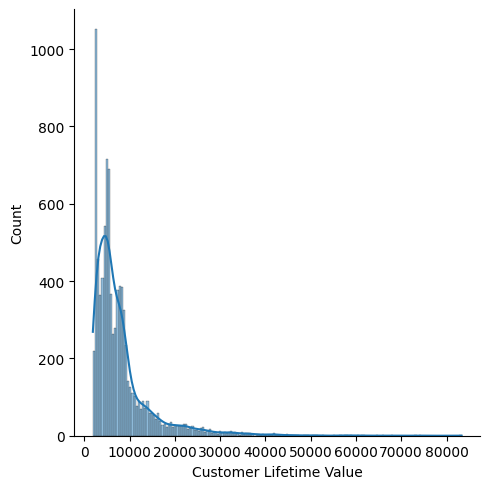

In [10]:
sns.displot(df['Customer Lifetime Value'], kde=True)

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

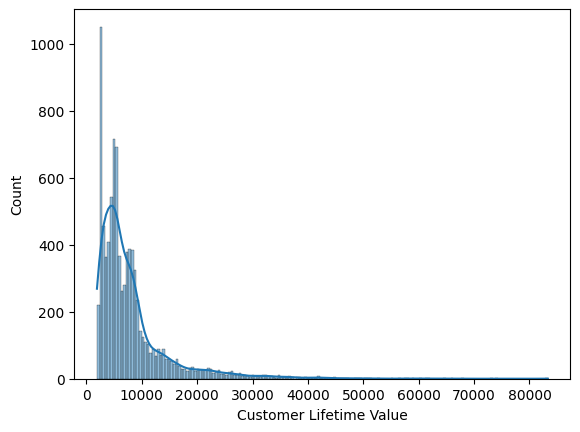

In [11]:
sns.histplot(df['Customer Lifetime Value'], kde=True)

<Axes: ylabel='Customer Lifetime Value'>

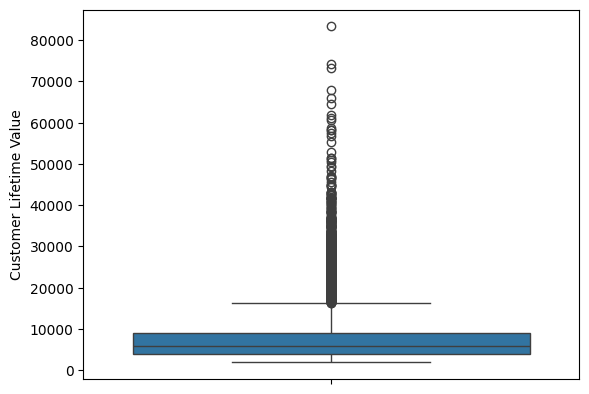

In [12]:
sns.boxplot(df['Customer Lifetime Value'])

The boxplot indicates that there are lot of outliers present. It can be due to dramatically high value customers contributing to customer lifetime value.

In [13]:
#Lets find out the value of skewness
df['Customer Lifetime Value'].skew()

3.041895454167866

The value is postive and the magnitude is high, reflecting a highly right skewed data

**Income Value Analysis**

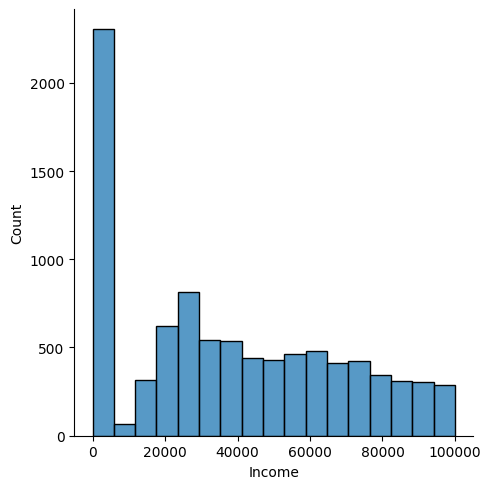

In [14]:
sns.displot(df['Income'])

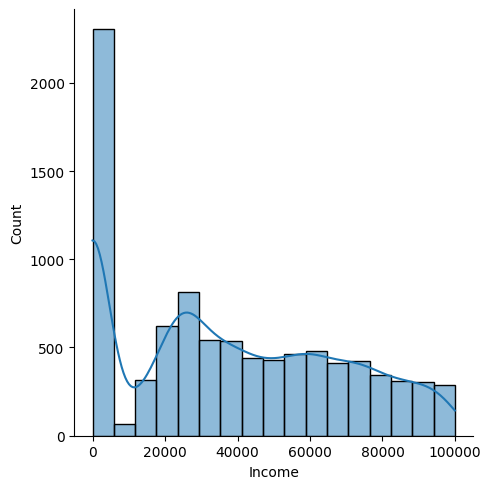

In [15]:
sns.displot(df['Income'], kde=True)

It is right skewed which means most indviduals have low income

<Axes: ylabel='Income'>

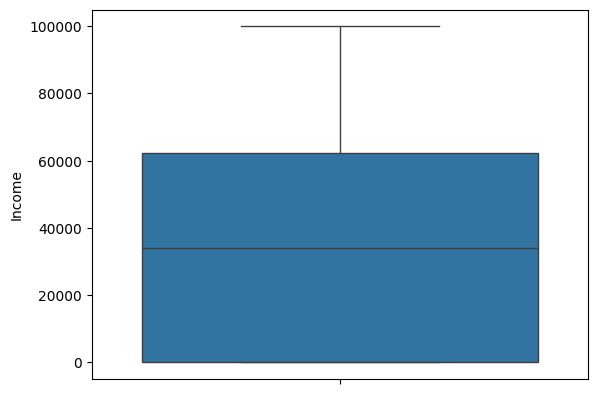

In [16]:
sns.boxplot(df['Income'])

There are outliers present but they are not big in number. 

**Bivariate Analysis**

<Axes: xlabel='Income', ylabel='Customer Lifetime Value'>

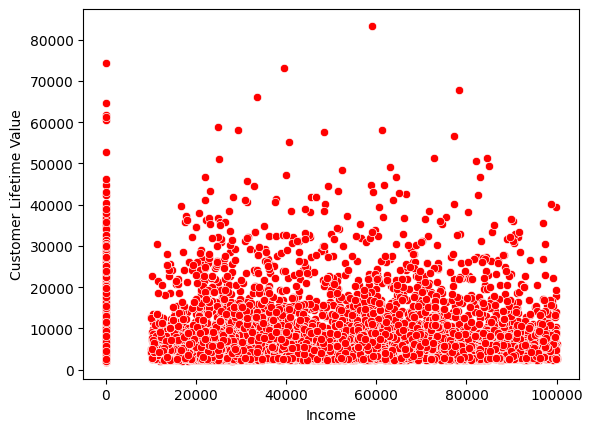

In [17]:
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=df, color='r')

It can be seen that there is no linear relationship between income and customer lifetime value.

**Monthly Premium Auto Analysis**

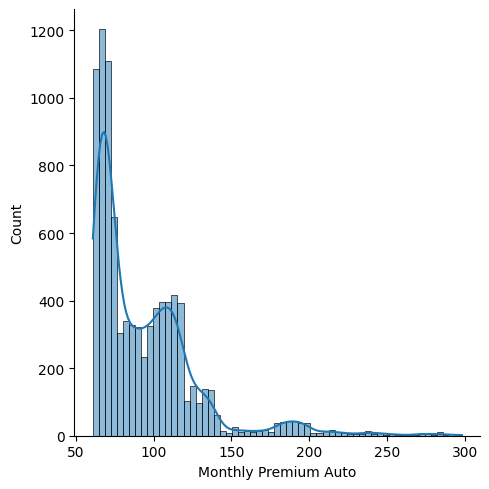

In [18]:
sns.displot(df['Monthly Premium Auto'], kde=True)

well we can it is right skewed as most pay lower to moderate auto premium.

<Axes: ylabel='Monthly Premium Auto'>

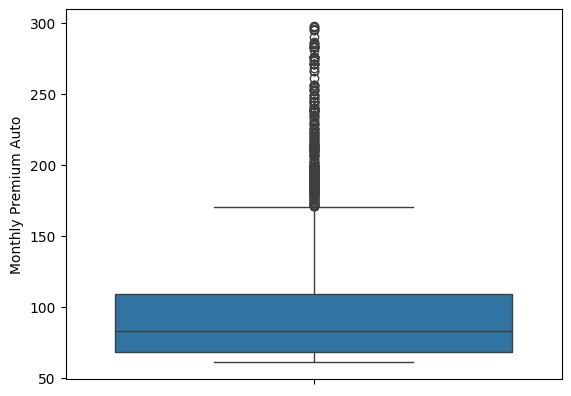

In [19]:
sns.boxplot(df['Monthly Premium Auto'])

Outliers pay signifiicantly high auto preimum.

**Bivariate Analysis**

<Axes: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

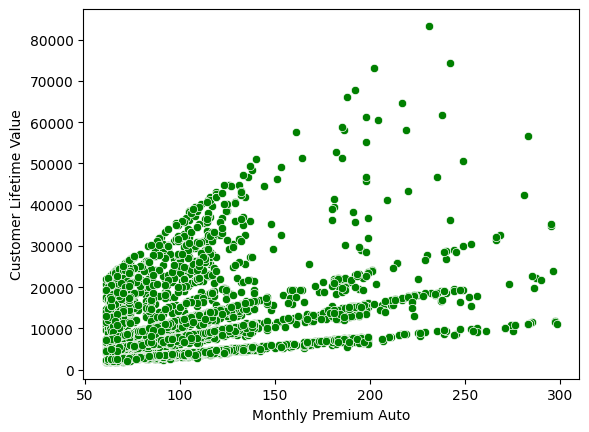

In [20]:
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=df, color='g')

There is linear relationship between monthly auto preimum and clv. It shows a positive correlation.

**Total Claim Amount Analysis**

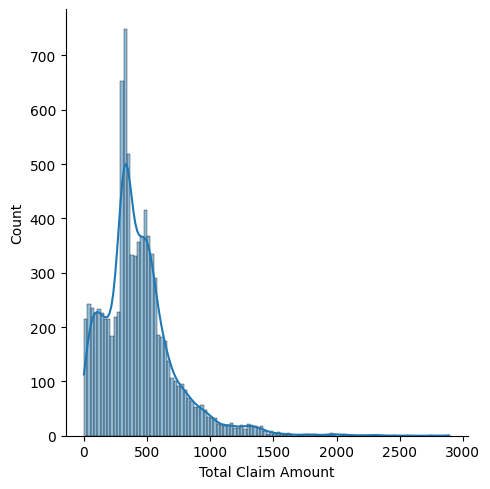

In [21]:
sns.displot(df['Total Claim Amount'], kde=True)

<Axes: ylabel='Total Claim Amount'>

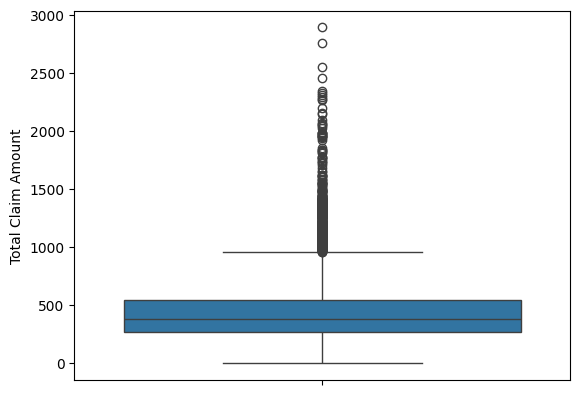

In [22]:
sns.boxplot(df['Total Claim Amount'])

It can be seen that there are numerous no.s of outliers suggesting that there are high value claims which do not lie on typical range.

<Axes: xlabel='Total Claim Amount', ylabel='Customer Lifetime Value'>

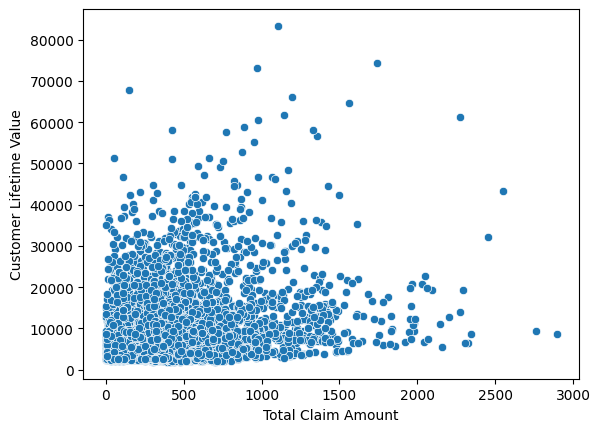

In [23]:
#Bivariate Analysis
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=df)

There is a linear relationship between CLV and Total Claim Amount.

**Months Since Last Claim Analysis**

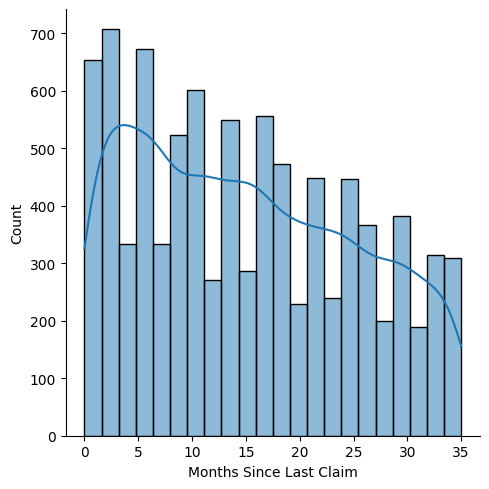

In [24]:
sns.displot(df['Months Since Last Claim'], kde=True)

Distribution seems to be right-skewed suggesting that there are more recent claims, with the tail extending towards higher no. of months.

<Axes: ylabel='Months Since Last Claim'>

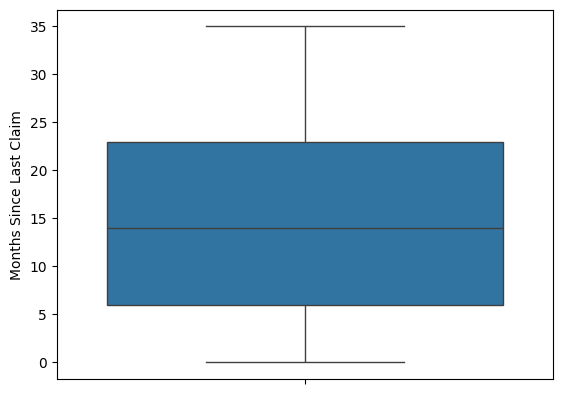

In [25]:
sns.boxplot(df["Months Since Last Claim"])

It can be seen that most claims occurs during a certain range.

<Axes: xlabel='Months Since Last Claim', ylabel='Customer Lifetime Value'>

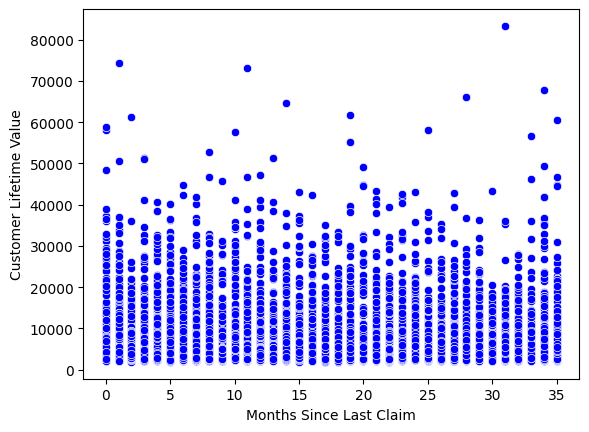

In [26]:
sns.scatterplot(x="Months Since Last Claim", y="Customer Lifetime Value", data=df, color='b')

There is no correlation between CLV and months since last claim.

**Months Since Policy Inception Analysis**

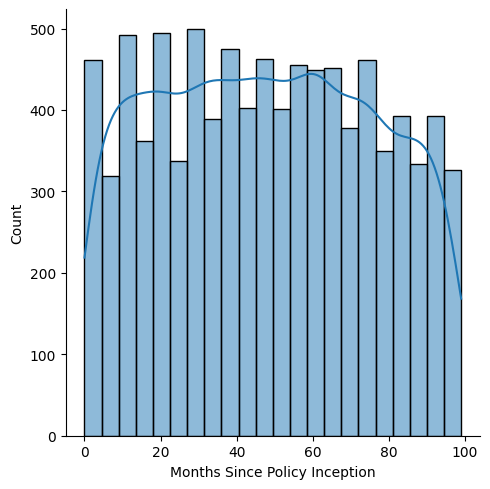

In [27]:
sns.displot(df["Months Since Policy Inception"], kde=True)

The distribution seems relatively uniform with occasional spikes.

<Axes: ylabel='Months Since Policy Inception'>

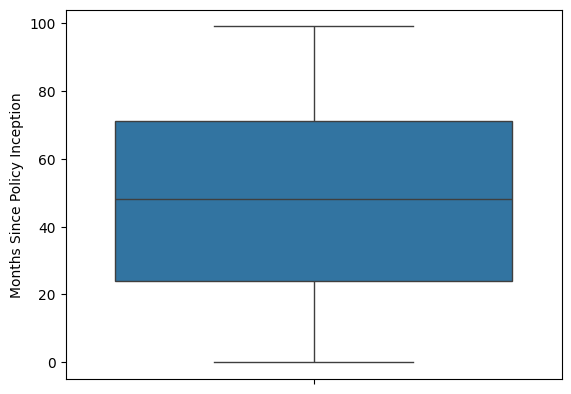

In [28]:
sns.boxplot(df["Months Since Policy Inception"])

This reveals that some policies have been active for significantly longer or shorter than most.

<Axes: xlabel='Months Since Policy Inception', ylabel='Customer Lifetime Value'>

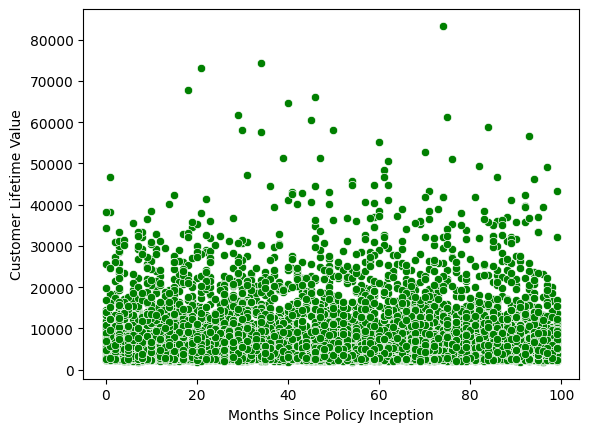

In [29]:
sns.scatterplot(x="Months Since Policy Inception", y="Customer Lifetime Value", data=df, color='g')

There is no correlation between months since policy inception and customer lifetime value.

**Dealing with the Categorical Variables**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9084 entries, 0 to 9083
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9084 non-null   float64
 1   Response                       9084 non-null   object 
 2   Coverage                       9084 non-null   object 
 3   Education                      9084 non-null   object 
 4   EmploymentStatus               9084 non-null   object 
 5   Gender                         9084 non-null   object 
 6   Income                         9084 non-null   int64  
 7   Location Code                  9084 non-null   object 
 8   Marital Status                 9084 non-null   object 
 9   Monthly Premium Auto           9084 non-null   int64  
 10  Months Since Last Claim        9084 non-null   int64  
 11  Months Since Policy Inception  9084 non-null   int64  
 12  Number of Open Complaints      9084 non-null   i

In [31]:
cat_col = df.select_dtypes(include=['object'])
no_col = df[["Number of Open Complaints","Number of Policies"]]
cat_col = pd.concat([cat_col,no_col],axis=1)
cat_col.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Vehicle Size,Number of Open Complaints,Number of Policies
0,No,Basic,Bachelor,Employed,F,Suburban,Married,Medsize,0,1
1,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Medsize,0,8
2,No,Premium,Bachelor,Employed,F,Suburban,Married,Medsize,0,2
3,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Medsize,0,7
4,No,Basic,Bachelor,Employed,M,Rural,Single,Medsize,0,1


Lets find the summary of the unique values in the above table.

In [32]:
for i in cat_col:
    print('Unique values in', str(i), 'is', df[i].nunique())
    print(df[i].value_counts())
    print('-----------------------')

Unique values in Response is 2
Response
No     7782
Yes    1302
Name: count, dtype: int64
-----------------------
Unique values in Coverage is 3
Coverage
Basic       5544
Extended    2719
Premium      821
Name: count, dtype: int64
-----------------------
Unique values in Education is 5
Education
Bachelor                2734
College                 2668
High School or Below    2607
Master                   737
Doctor                   338
Name: count, dtype: int64
-----------------------
Unique values in EmploymentStatus is 5
EmploymentStatus
Employed         5668
Unemployed       2303
Medical Leave     430
Disabled          401
Retired           282
Name: count, dtype: int64
-----------------------
Unique values in Gender is 2
Gender
F    4637
M    4447
Name: count, dtype: int64
-----------------------
Unique values in Location Code is 3
Location Code
Suburban    5750
Rural       1763
Urban       1571
Name: count, dtype: int64
-----------------------
Unique values in Marital Status is 

**Response Analysis**

<Axes: xlabel='count', ylabel='Response'>

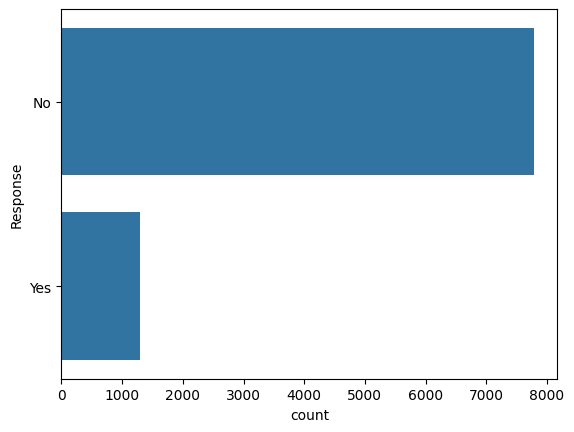

In [33]:
sns.countplot(df['Response'])

**Coverage Analysis**

<Axes: xlabel='count', ylabel='Coverage'>

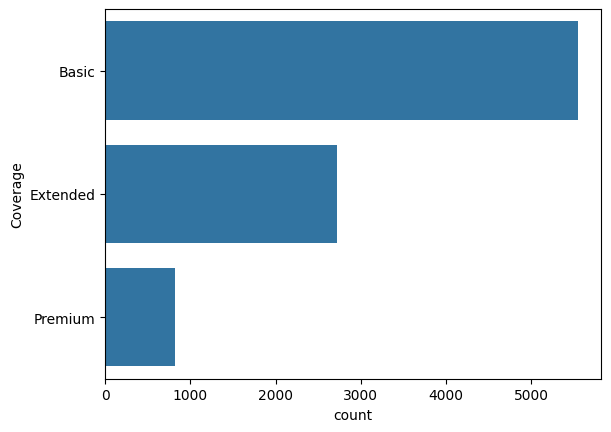

In [34]:
sns.countplot(df["Coverage"])

**Education Analysis**

<Axes: xlabel='count', ylabel='Education'>

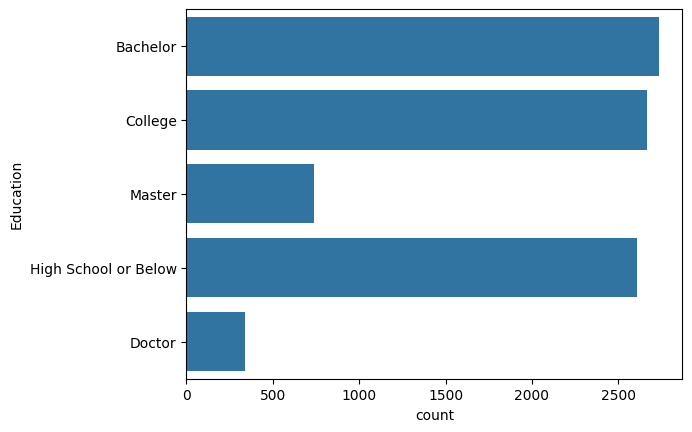

In [35]:
sns.countplot(df["Education"])

**Employment Status Analysis**

<Axes: xlabel='count', ylabel='EmploymentStatus'>

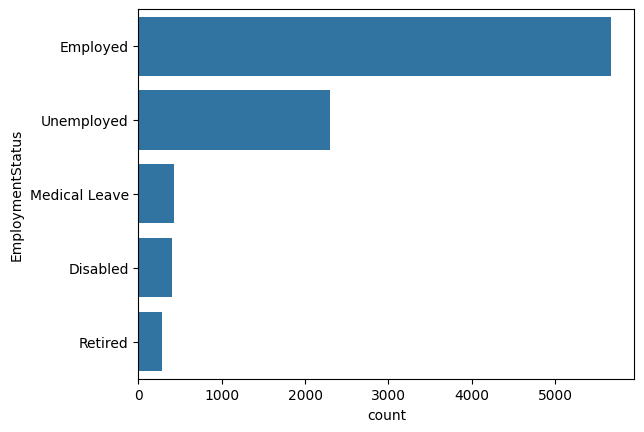

In [36]:
sns.countplot(df["EmploymentStatus"])

Most of the customers are employed because they are more likely to afford the insurance than others.

In [37]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         5668
Unemployed       2303
Medical Leave     430
Disabled          401
Retired           282
Name: count, dtype: int64

In [38]:
df['EmploymentStatus'].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.395421
Unemployed       25.352268
Medical Leave     4.733598
Disabled          4.414355
Retired           3.104359
Name: proportion, dtype: float64

Around 62.38% of the customers are employed.

Around 25.35% of the customers are unemployed.

Around 4.73% of the customers are on Medical Leave.

**Location Code Analysis**

<Axes: xlabel='count', ylabel='Location Code'>

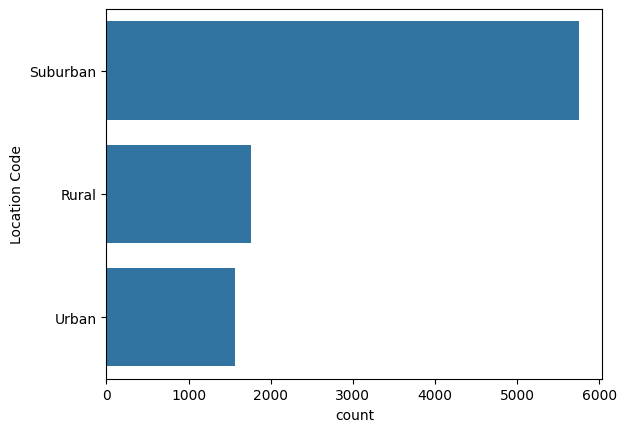

In [39]:
sns.countplot(df['Location Code'])

Suburban customers dominate. Rural and urban areas lag due to affordability, accessibility, and perceived need.

**Marital Status Analysis**

<Axes: xlabel='count', ylabel='Marital Status'>

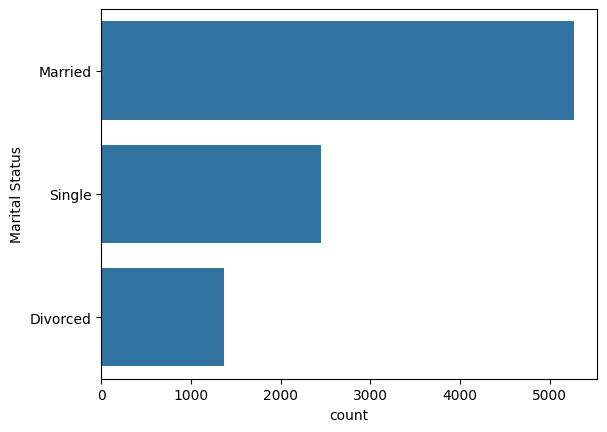

In [40]:
sns.countplot(df["Marital Status"])

Married couples often prioritize insurance more than singles or divorcees, likely due to shared financial responsibilities and family planning.

**Vehicle Size Analysis**

<Axes: xlabel='count', ylabel='Vehicle Size'>

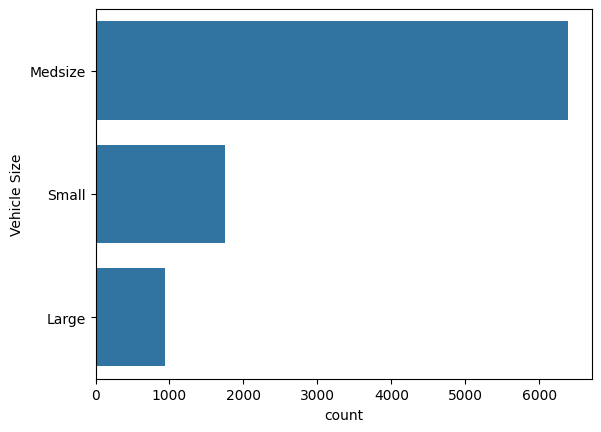

In [41]:
sns.countplot(df["Vehicle Size"])

The majority of customers prefer mid-sized vehicles, suggesting a balance.

**No of open Complaints Analysis**

[Text(0.5, 1.0, 'Countplot of Number of Open Complaints'),
 Text(0.5, 0, 'Number of Open Complaints'),
 Text(0, 0.5, 'Count')]

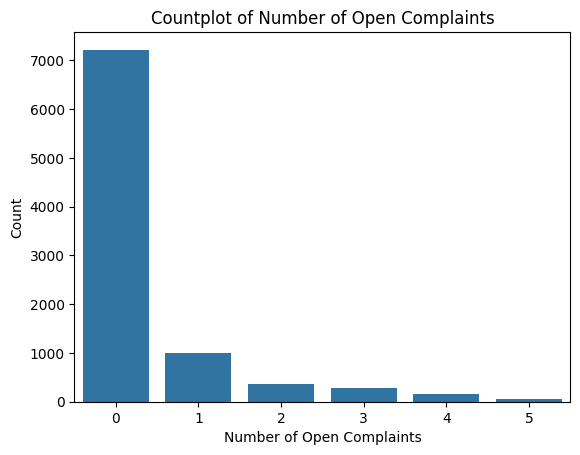

In [42]:
sns.countplot(x=df["Number of Open Complaints"]).set(title='Countplot of Number of Open Complaints', xlabel='Number of Open Complaints', ylabel='Count')

High no. of open complaints suggests that significant No.of customers are satisfied with the services. This positive feedback indiactes that the company is working efficiently and should maintain it.

**No of Policies Analysis**

[Text(0.5, 1.0, 'Countplot of Number of Policies'),
 Text(0.5, 0, 'Number of Policies'),
 Text(0, 0.5, 'Count')]

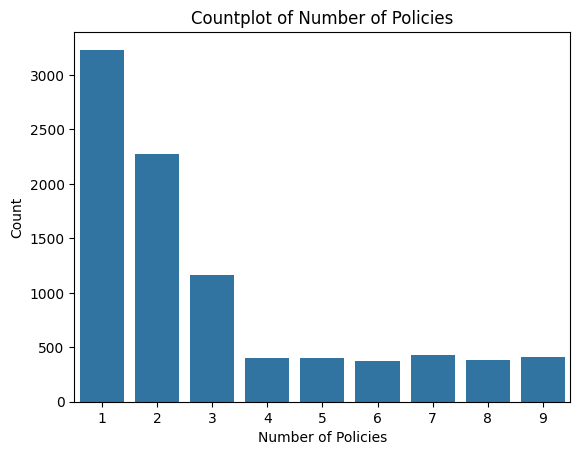

In [43]:
sns.countplot(x=df["Number of Policies"]).set(title='Countplot of Number of Policies', xlabel='Number of Policies', ylabel='Count')

#### Visualizing Correlation with Heatmap

I created a heatmap to visualize correlations between key features like Customer Lifetime Value, Income, Monthly Premium Auto, and Total Claim Amount. This aids feature selection and engineering for predictive modeling.

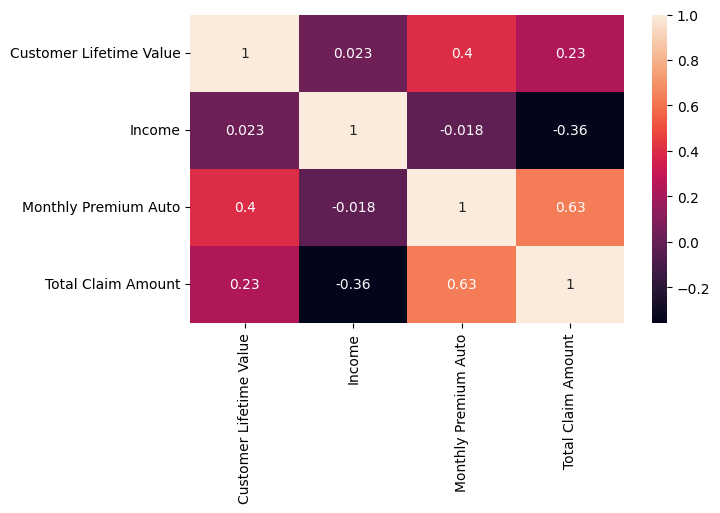

In [44]:
heatmap = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']]
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(), annot=True)
plt.savefig('Heatmap.png')

| Feature 1 \ Feature 2 | Customer Lifetime Value | Income | Monthly Premium Auto | Total Claim Amount | Strength |
|---|---|---|---|---|---|
| Customer Lifetime Value | 1 | 0.023 | **0.4** | 0.23 | Moderately correlated with Monthly Premium Auto |
| Income | 0.023 | 1 | -0.018 | -0.36 |  |
| Monthly Premium Auto | **0.4** | -0.018 | 1 | **0.63** | Strongly correlated with Total Claim Amount |
| Total Claim Amount | 0.23 | -0.36 | **0.63** | 1 | Strongly correlated with Monthly Premium Auto |

**Analyzing the Effect of Income on Coverage**

Let group the data by 'Coverage' and calculate the mean income for each group and sort them as well.

In [45]:
df.groupby(['Coverage'])[['Income']].mean()

,Income
Coverage,
Basic,38174.472222
Extended,36386.366311
Premium,38519.872107


In [46]:
df.groupby(['Coverage'])[['Income']].mean().sort_values(by='Income', ascending=False)

,Income
Coverage,
Premium,38519.872107
Basic,38174.472222
Extended,36386.366311


Premium policies offer better value and coverage compared to Basic policies, with only a small difference in cost. Therefore, focusing on promoting Premium policies during marketing campaigns can be more beneficial for customers.

**Analyzing the Effect of Education on Income**

Let group the data by 'Education' and calculate the mean income for each group and sort them as well.

In [47]:
df.groupby(['Education'])[['Income']].mean()

,Income
Education,
Bachelor,37411.482809
College,37403.627811
Doctor,42530.683432
High School or Below,35578.729574
Master,44767.472185


In [48]:
df.groupby(['Education'])[['Income']].mean().sort_values(by='Income', ascending=False)

,Income
Education,
Master,44767.472185
Doctor,42530.683432
Bachelor,37411.482809
College,37403.627811
High School or Below,35578.729574


People with Master's or Doctorate degrees earn the most. Those with Bachelor's or College degrees earn about the same. People with only a High School degree or less earn the least. So, the more education you have, the more you tend to earn. 

**Analyzing the Effect of Coverage on Customer Lifetime Value**

Lets group the data by 'Coverage' and calculate the mean Customer Lifetime Value (CLV) for each coverage type. Sorting these groups by their average CLV in descending order helps us understand if certain coverage types are associated with higher CLV.

In [49]:
df.groupby(['Coverage'])[['Customer Lifetime Value']].mean()

,Customer Lifetime Value
Coverage,
Basic,7182.062248
Extended,8789.473715
Premium,10909.448070


In [50]:
df.groupby(['Coverage'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value', ascending=False)

,Customer Lifetime Value
Coverage,
Premium,10909.448070
Extended,8789.473715
Basic,7182.062248


Customers with Premium coverage spend the most money with us, followed by those with Extended, and then Basic coverage. So, the more coverage you have, the more you tend to spend with us. 

**Analyzing the Effect of Education on Customer Lifetime Value**

Lets group the data by 'Education' and calculate the mean Customer Lifetime Value (CLV) for each coverage type. Sorting these groups by their average CLV in descending order helps us understand if certain Education levels are associated with higher CLV.

In [51]:
df.groupby(['Education'])[['Customer Lifetime Value']].mean()

,Customer Lifetime Value
Education,
Bachelor,7865.479906
College,7867.578191
Doctor,7534.767352
High School or Below,8265.555327
Master,8253.207897


In [52]:
df.groupby(['Education'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value', ascending=False)

,Customer Lifetime Value
Education,
High School or Below,8265.555327
Master,8253.207897
College,7867.578191
Bachelor,7865.479906
Doctor,7534.767352


Surprisingly, people with only a High School degree or less spend the most money with us. Those with a Master's degree come next, and people with Bachelor's, College, or Doctorate degrees spend the least. So, it seems that higher education levels might not necessarily lead to higher spending with us. 


**Analyzing the Effect of Marital Status on Customer Lifetime Value**

Lets group the data by 'Marital Status' and calculate the mean Customer Lifetime Value (CLV) for each coverage type. Sorting these groups by their average CLV in descending order helps us determine if Marital Status are associated with higher CLV.

In [53]:
df.groupby(['Marital Status'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value', ascending=False)

,Customer Lifetime Value
Marital Status,
Divorced,8237.606765
Married,8076.530352
Single,7703.946430


Surprisingly, divorced people spend the most money with us, followed by married people, and then single people. So, it seems that being divorced might lead to higher spending with us. 

## Data Preprocessing

In [54]:
cat_g = pd.get_dummies(cat_col, drop_first=True)
cat_g = cat_g.astype(int)
df1 = pd.concat([num_col, cat_g], axis=1)
df1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Response_Yes,Coverage_Extended,...,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,1,...,0,0,1,0,1,0,0,1,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,1,0,1,0,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,0,1,1,1,0,1,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [55]:
df1.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Total Claim Amount', 'Number of Open Complaints', 'Number of Policies',
       'Response_Yes', 'Coverage_Extended', 'Coverage_Premium',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_M',
       'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Married', 'Marital Status_Single',
       'Vehicle Size_Medsize', 'Vehicle Size_Small'],
      dtype='object')

In [56]:
df1.rename(columns={'Customer Lifetime Value':'CLV'}, inplace=True)
df1.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Total Claim Amount',
       'Number of Open Complaints', 'Number of Policies', 'Response_Yes',
       'Coverage_Extended', 'Coverage_Premium', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Married',
       'Marital Status_Single', 'Vehicle Size_Medsize', 'Vehicle Size_Small'],
      dtype='object')

**Extracting Features and Target:**

**Splitting the Dataset:**

In [57]:
X = df1.drop(['CLV'], axis=1)
y = df1['CLV']
y = np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7267, 25)
(7267,)
(1817, 25)
(1817,)


In [58]:
X_train

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Response_Yes,Coverage_Extended,Coverage_Premium,...,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Vehicle Size_Medsize,Vehicle Size_Small
8957,85245,115,6,96,556.568103,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5748,0,116,0,8,1148.461246,2,8,0,0,0,...,0,0,1,0,1,0,0,1,1,0
2133,0,92,34,39,441.600000,1,2,0,1,0,...,0,0,1,0,1,0,0,1,0,0
6091,60884,77,10,56,491.848498,0,4,0,1,0,...,0,0,0,0,1,0,1,0,0,1
2523,58828,68,13,98,446.751243,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,76912,116,0,55,169.226996,2,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5191,0,125,2,84,600.000000,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5390,68787,66,7,64,105.379402,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
860,0,139,5,56,667.200000,0,2,1,1,0,...,0,0,1,0,1,0,0,0,1,0


**Standardizing the Data:**

Standardization is applied to ensure that features are scaled, making the regression model's convergence more stable and faster.

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train

array([[ 1.55930114,  0.624968  , -0.9025228 , ..., -0.6092061 ,
        -1.54834814, -0.48654462],
       [-1.24422442,  0.65390949, -1.49732025, ...,  1.6414806 ,
         0.64584958, -0.48654462],
       [-1.24422442, -0.04068614,  1.87319862, ...,  1.6414806 ,
        -1.54834814, -0.48654462],
       ...,
       [ 1.01803276, -0.79316474, -0.80338989, ..., -0.6092061 ,
         0.64584958, -0.48654462],
       [-1.24422442,  1.31956363, -1.00165571, ..., -0.6092061 ,
         0.64584958, -0.48654462],
       [-1.24422442, -0.79316474, -0.9025228 , ..., -0.6092061 ,
        -1.54834814, -0.48654462]])

In [61]:
X_test

array([[-1.24422442, -0.27221802,  0.28707209, ..., -0.6092061 ,
         0.64584958, -0.48654462],
       [-0.90508482, -0.44586693, -0.50599117, ..., -0.6092061 ,
        -1.54834814, -0.48654462],
       [-1.24422442, -0.27221802,  0.18793919, ...,  1.6414806 ,
        -1.54834814,  2.05530997],
       ...,
       [-0.67996742,  0.85649988,  1.77406571, ..., -0.6092061 ,
        -1.54834814,  2.05530997],
       [ 0.78209525, -0.93787217, -0.9025228 , ..., -0.6092061 ,
         0.64584958, -0.48654462],
       [-0.38969917, -0.09856911,  1.6749328 , ..., -0.6092061 ,
        -1.54834814,  2.05530997]])

**Applying Linear Regression Model**

In [62]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [63]:
reg_model.score(X_test, y_test)

0.23144086713491707

In [64]:
reg_model.coef_

array([ 4.84079080e-03,  2.82768449e-01,  4.07191299e-03, -1.03382685e-04,
       -4.50445647e-03, -3.30503223e-02,  1.32148435e-01, -4.12763404e-03,
        2.04025392e-02,  1.43210672e-02,  1.13984796e-02, -7.24663180e-03,
        1.55961254e-02,  9.41211352e-03, -3.80677588e-03, -1.20460068e-02,
       -1.08183999e-02, -2.70318404e-02, -6.08233419e-03, -7.36839134e-03,
       -1.63559781e-03, -5.61634081e-03, -2.01339454e-02,  1.96865077e-02,
        1.98145828e-02])

In [65]:
reg_model.intercept_

8.746798347250303

In [66]:
print(f'R^2 score for train: {reg_model.score(X_train, y_train)}')
print(f'R^2 score for test: {reg_model.score(X_test, y_test)}')

R^2 score for train: 0.24870855165725425
R^2 score for test: 0.23144086713491707


The R² scores for the training set (0.2448) and the testing set (0.2314) are quite similar, indicating that the model has consistent performance across both sets. However, the relatively low R² values suggest that the model explains only about 24% of the variance in the target variable, implying that there may be other factors influencing the Customer Lifetime Value that are not captured by the current model.R² values decreae slightly from training to testing data it shows negligible amount of overfitting

**Evaluating Model Performance Metrics**

In [67]:
y_pred = reg_model.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.5872003450233723
MAE 0.4552368406984245
R-squared: 0.23144086713491707


The RMSE and MAE values indicate that the model has a moderate level of prediction error, with errors being more pronounced in RMSE compared to MAE. The R² score of 0.2314 shows that the model explains approximately 23% of the variance in the target variable.

**Model:** Linear Regression (reg_model)

**Data Split:** Training and Testing Sets Used

**Performance Metrics:**

* **R-squared (Training):** 0.2487 (24.87%)
* **R-squared (Testing):** 0.2314 (23.14%)
* **RMSE:** 0.5872
* **MAE:** 0.4552

**Interpretation:**

* **R-squared:** The R-squared values for both training and testing sets are low, indicating that the model  only explains a small portion (around 23%) of the variance in Customer Lifetime Value (CLV). This suggests there might be other important factors not captured by the current model.
* **Similar Training and Testing R-squared:** The slight decrease in R-squared from training to testing data suggests negligible overfitting. The model is  generalizing reasonably well to unseen data.
* **RMSE and MAE:** The RMSE (0.5872) and MAE (0.4552) provide absolute error measures for the model's predictions. A lower value indicates better performance.

**Overall:**

The model shows some ability to predict CLV but has limitations. The low R-squared scores suggest room for improvement. 

## Applying OLS Model 

**Understanding OLS and Its Usage in Linear Regression**

**OLS (Ordinary Least Squares)** is a statistical method used to estimate the unknown parameters of a linear regression model. It's a widely used technique to model the relationship between a dependent variable (y) and one or more independent variables (X).

**Why Use OLS?**

1. **Parameter Estimation:** OLS helps estimate the coefficients (slopes) of the linear regression equation, which represent the impact of each independent variable on the dependent variable.
2. **Model Fit:** It assesses how well the model fits the data by calculating the sum of squared residuals (SSR). Lower SSR indicates a better fit.
3. **Hypothesis Testing:** OLS allows you to test hypotheses about the significance of individual coefficients and the overall model.
4. **Prediction:** Once the model is fitted, it can be used to make predictions for new data points.

2. **Adding a Constant Term:**
   - `X_constant = sm.add_constant(X)` adds a constant term (intercept) to the feature matrix `X`. This is necessary for the OLS model to estimate the intercept term.

3. **Fitting the OLS Model:**
   - `ols_reg = sm.OLS(y, X_constant).fit()` creates an OLS model object and fits it to the data. The `fit()` method estimates the model parameters using the OLS method.

4. **Model Summary:**
   - `ols_reg.summary()` prints a detailed summary of the fitted model, including:
     - Coefficients and their standard errors
     - p-values for hypothesis testing
     - R-squared and adjusted R-squared
     - F-statistic and its p-value
     - Other statistical measures

By using OLS, you can gain valuable insights into the relationships between the features and the target variable, assess the model's overall fit, and make informed predictions.


In [68]:
import statsmodels.api as sm
#Adding a constant term to the feature set to include an intercept in the regression model.
X_constant = sm.add_constant(X)
ols_reg = sm.OLS(y, X_constant).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     118.1
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:38:34   Log-Likelihood:                -7728.6
No. Observations:                9084   AIC:                         1.551e+04
Df Residuals:                    9058   BIC:                         1.569e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.7765      0.049    159.591      0.000       7.681       7.872
Income                            8.9e-08   3.48e-07      0.255      0.798   -5.94e-07    7.72e-07
Monthly Premium Auto               0.0086      0.000     29.332      0.000       0.008       0.009
Months Since Last Claim            0.0005      0.001      0.849      0.396      -0.001       0.002
Months Since Policy Inception     -0.0001      0.000     -0.520      0.603      -0.001       0.000
Total Claim Amount             -6.197e-05   4.28e-05     -1.449      0.147      -0.000    2.18e-05
Number of Open Complaints         -0.0292      0.007     -4.456      0.000      -0.042      -0.016
Number of Policies                 0.0548      0.002     21.982      0.000       0.050       0.060
Response_Yes                      -0.0140      0.018     -0.773      0.439      -0.049       0.021
Coverage_Extended                  0.0410      0.014      2.936      0.003       0.014       0.068
Coverage_Premium                   0.0386      0.023      1.642      0.101      -0.007       0.085
Education_College                  0.0084      0.015      0.541      0.589      -0.022       0.039
Education_Doctor                  -0.0414      0.033     -1.259      0.208      -0.106       0.023
Education_High School or Below     0.0306      0.016      1.958      0.050   -4.11e-05       0.061
Education_Master                   0.0137      0.024      0.577      0.564      -0.033       0.060
EmploymentStatus_Employed          0.0266      0.032      0.829      0.407      -0.036       0.089
EmploymentStatus_Medical Leave    -0.0132      0.039     -0.335      0.738      -0.091       0.064
EmploymentStatus_Retired          -0.0077      0.045     -0.170      0.865      -0.097       0.081
EmploymentStatus_Unemployed       -0.0228      0.032     -0.704      0.482      -0.086       0.041
Gender_M                          -0.0145      0.012     -1.205      0.228      -0.038       0.009
Location Code_Suburban             0.0038      0.024      0.161      0.872      -0.043       0.051
Location Code_Urban                0.0262      0.022      1.199      0.231      -0.017       0.069
Marital Status_Married            -0.0206      0.017     -1.179      0.239      -0.055       0.014
Marital Status_Single             -0.0551      0.020     -2.700      0.007      -0.095      -0.015
Vehicle Size_Medsize               0.0380      0.020      1.913      0.056      -0.001       0.077
Vehicle Size_Small                 0.0438      0.023      1.892      0.059      -0.002       0.089
==============================================================================
Omnibus:                     1427.177   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (J

## Model Summary

**Dependent Variable:** Customer Lifetime Value (CLV)

**Model:** Ordinary Least Squares (OLS) Regression

**Key Findings:**

* **R-squared:** 0.246, indicating that approximately 24.6% of the variation in CLV is explained by the independent variables.
* **Adjusted R-squared:** 0.244, accounting for the number of predictors.

**Significant Predictors:**

* **Monthly Premium Auto:** A positive and significant relationship, suggesting that higher monthly premiums are associated with higher CLV.
* **Number of Policies:** A positive and significant relationship, indicating that customers with more policies tend to have higher CLV.
* **Number of Open Complaints:** A negative and significant relationship, implying that customers with more open complaints have lower CLV.
* **Vehicle Size:** Larger vehicle sizes (Medsize and Small) are positively associated with CLV, though the relationship is not as strong as with monthly premiums and number of policies.

**Other Factors:**

While some other factors like income, education, employment status, and location show some influence, their impact is not as statistically significant as the variables mentioned above.

**Model Limitations:**

* **Multicollinearity:** The high condition number (5.7e+05) suggests potential multicollinearity among the independent variables, which can affect the precision of the coefficient estimates.
* **Limited Explanatory Power:** The relatively low R-squared indicates that the model explains only a small portion of the variation in CLV. Other factors not included in the model may be influencing CLV.

# Problem 2: Predicting the Risk of Diabetes in Adults (Binary Classification)

**Class 1**: High risk for diabetes (indicating that intervention may be needed).

**Class 0**: Low risk for diabetes (indicating that the person is less likely to have or develop diabetes based on the model’s learned patterns).

In [69]:
data = pd.read_csv("diabetes_prediction.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [70]:
data.age.describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [71]:
data.age.describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [72]:
data.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [74]:
data.shape

(100000, 9)

The dataset contains 100,000 entries and nine columns, with features including age, gender, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and the target variable diabetes (indicating if the person has diabetes or not).

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [76]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [77]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [78]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Applying Distribution plots**

<Axes: xlabel='age', ylabel='Count'>

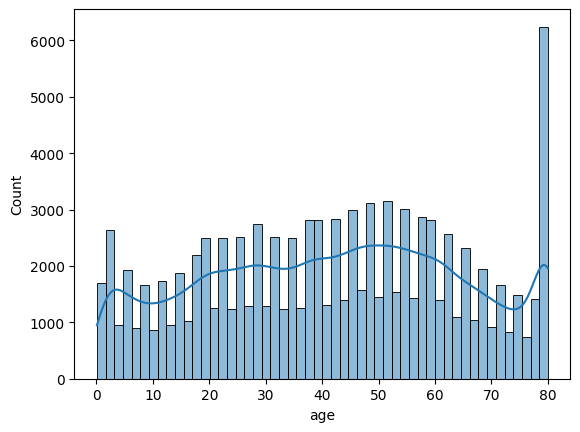

In [79]:
sns.histplot(data['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

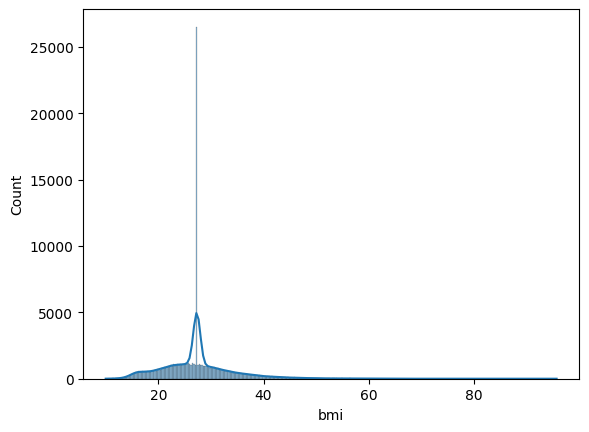

In [80]:
sns.histplot(data['bmi'], kde=True)

<Axes: xlabel='HbA1c_level', ylabel='Count'>

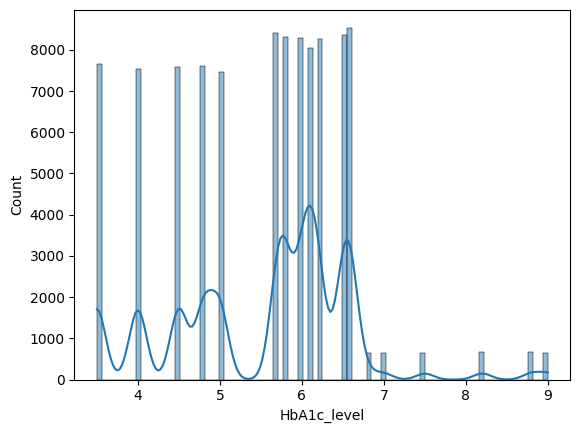

In [81]:
sns.histplot(data['HbA1c_level'], kde=True)

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

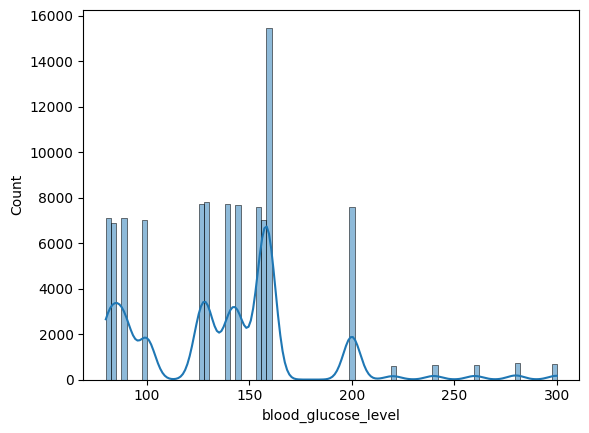

In [82]:
sns.histplot(data['blood_glucose_level'], kde=True)

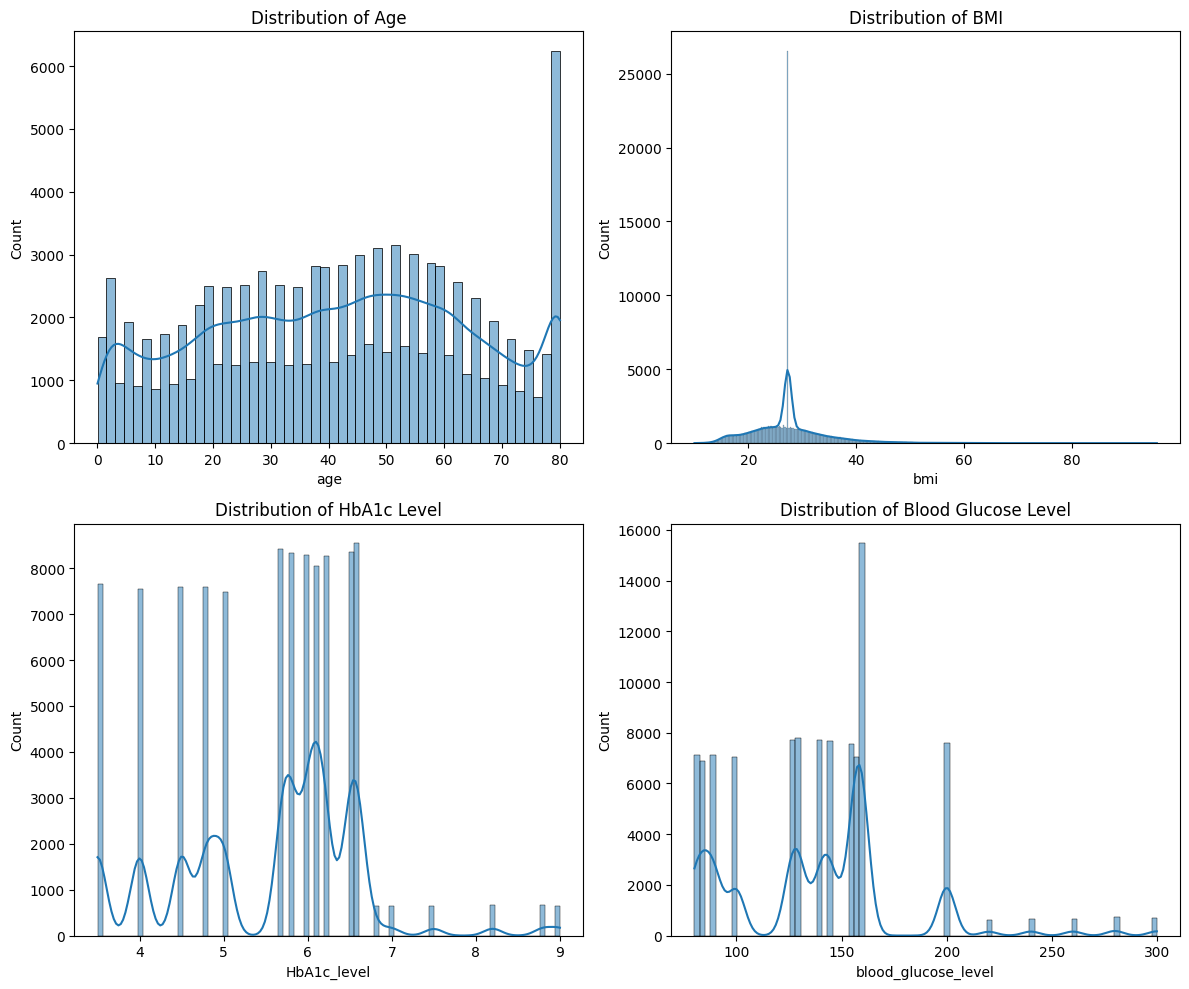

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Age")

sns.histplot(data['bmi'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of BMI")

sns.histplot(data['HbA1c_level'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of HbA1c Level")

sns.histplot(data['blood_glucose_level'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Blood Glucose Level")

plt.tight_layout()
plt.show()

In [84]:
data.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [85]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

**Encoding categorical variables**

In [86]:
label_age = LabelEncoder()
data['gender'] = label_age.fit_transform(data['gender'])

label_smoking = LabelEncoder()
data['smoking_history'] = label_smoking.fit_transform(data['smoking_history'])

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


**Applying Correlation matrix**

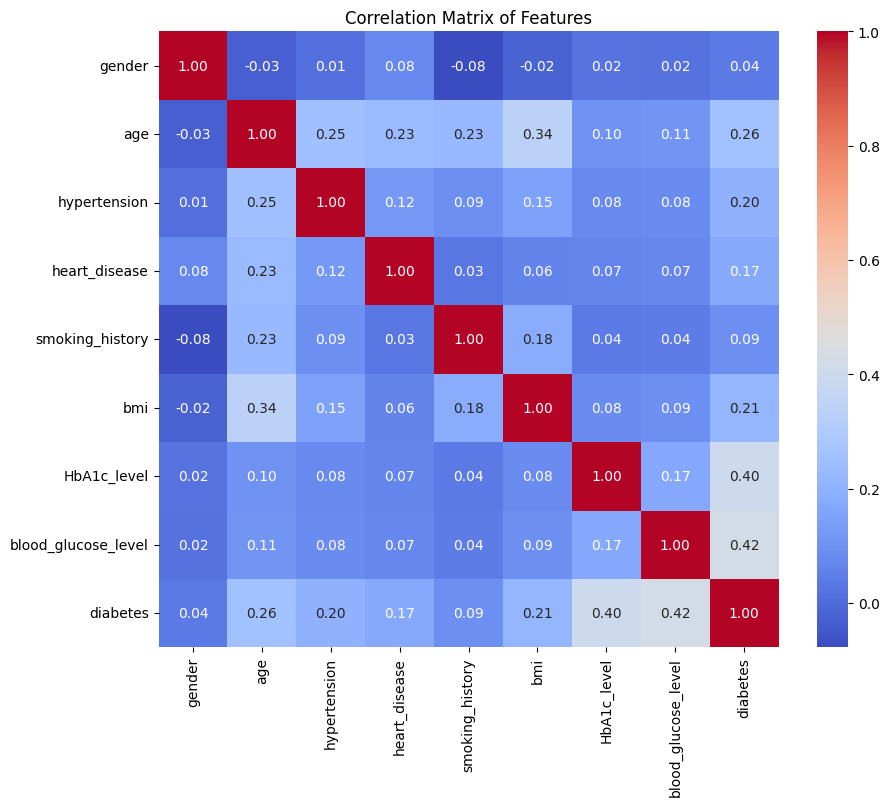

In [87]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.savefig('Feature_heatmap.png')
plt.show()

### Correlation Matrix Table

| Feature 1 \ Feature 2 | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
|---|---|---|---|---|---|---|---|---|---|
| gender | 1.00 | -0.03 | 0.01 | 0.08 | -0.08 | -0.02 | 0.02 | 0.02 | 0.04 |
| age | -0.03 | 1.00 | 0.25 | 0.23 | 0.23 | 0.34 | 0.10 | 0.11 | 0.26 |
| hypertension | 0.01 | 0.25 | 1.00 | 0.12 | 0.09 | 0.15 | 0.08 | 0.08 | 0.20 |
| heart_disease | 0.08 | 0.23 | 0.12 | 1.00 | 0.03 | 0.06 | 0.07 | 0.07 | 0.17 |
| smoking_history | -0.08 | 0.23 | 0.09 | 0.03 | 1.00 | 0.18 | 0.04 | 0.04 | 0.09 |
| bmi | -0.02 | 0.34 | 0.15 | 0.06 | 0.18 | 1.00 | 0.08 | 0.09 | 0.21 |
| HbA1c_level | 0.02 | 0.10 | 0.08 | 0.07 | 0.04 | 0.08 | 1.00 | 0.17 | 0.40 |
| blood_glucose_level | 0.02 | 0.11 | 0.08 | 0.07 | 0.04 | 0.09 | 0.17 | 1.00 | 0.42 |
| diabetes | 0.04 | 0.26 | 0.20 | 0.17 | 0.09 | 0.21 | 0.40 | 0.42 | 1.00 |


This correlation matrix shows the pairwise correlations between different features in the dataset. The values in the matrix range from -1 to 1, where:

* **1:** Perfect positive correlation (as one variable increases, the other also increases)
* **-1:** Perfect negative correlation (as one variable increases, the other decreases)
* **0:** No correlation

**Key Observations from the Matrix:**

* **Age:** Age is positively correlated with hypertension, heart disease, BMI, HbA1c level, blood glucose level, and diabetes. This indicates that as age increases, the risk of these conditions also tends to increase.
* **Hypertension, Heart Disease, and Diabetes:** These three conditions are positively correlated with each other, suggesting that they often occur together.
* **Smoking History:** Smoking history has a moderate positive correlation with age, BMI, and diabetes, indicating that smoking may increase the risk of these conditions.
* **BMI, HbA1c Level, and Blood Glucose Level:** These three variables are strongly correlated with each other, reflecting their close relationship in the development of diabetes.

By understanding these correlations, we can gain insights into the relationships between different factors and their potential impact on health outcomes.

In [88]:
data.gender.unique()

array([0, 1, 2])

In [89]:
data.smoking_history.unique()

array([4, 0, 1, 3, 2, 5])

**Extracting Features and Target and Splitting the Dataset**

In [90]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 8)
(80000,)
(20000, 8)
(20000,)


**Applying features Scaling**

In [92]:
scaler = StandardScaler()
X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.transform(X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

**Applying Logistic Regression**

In [93]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_report = classification_report(y_test, y_pred_logistic)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(logistic_report, logistic_accuracy)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000
 0.95875


**Applying Random Forest Classifier**

In [94]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(rf_report, rf_accuracy)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000
 0.97055


In [95]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(svm_report, svm_accuracy)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.56      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000
 0.9622


### Model Evaluation Summary

1. **Logistic Regression**:
   - **Accuracy**: 95.87%
   - **Precision (Class 1)**: 0.86
   - **Recall (Class 1)**: 0.61
   - **F1-Score (Class 1)**: 0.72

2. **Random Forest Classifier**:
   - **Accuracy**: 97.08%
   - **Precision (Class 1)**: 0.95
   - **Recall (Class 1)**: 0.69
   - **F1-Score (Class 1)**: 0.80
   - This model outperformed Logistic Regression in terms of accuracy and F1-score for the diabetes-positive class (1), making it a strong candidate for this task.

3. **Support Vector Machine (SVM)**:
   - **Accuracy**: 96.22%
   - **Precision (Class 1)**: 0.99
   - **Recall (Class 1)**: 0.56
   - **F1-Score (Class 1)**: 0.72
   - The SVM model had the highest precision for Class 1 but struggled with recall, indicating that it is more conservative in predicting diabetes-positive cases.

### Conclusion
The **Random Forest Classifier** achieved the highest overall performance with an accuracy of 97.08% and balanced precision-recall trade-offs. This makes it the most suitable model for predicting diabetes risk in this dataset.

**Grouping the Age to analyze the risk factor**

In [96]:
age_col = [18, 30, 45, 60, data['age'].max()]
age_labels = ['18-30', '31-45', '46-60', '61+']
data['age_group'] = pd.cut(data['age'], bins=age_col, labels=age_labels, right=False)

age_diabetes_distribution = data.groupby('age_group', observed=False)['diabetes'].mean() * 100  # Convert to percentage

age_diabetes_distribution.reset_index(name="Diabetes Risk (%)")

,age_group,Diabetes Risk (%)
0,18-30,1.261830
1,31-45,4.170630
2,46-60,10.919821
3,61+,20.109087


**Now Again Applying the Models**

In [97]:
data['age_group_encoded'] = LabelEncoder().fit_transform(data['age_group'])

In [98]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_group_encoded
0,0,80.0,0,1,4,25.19,6.6,140,0,NaN,4
1,0,54.0,0,0,0,27.32,6.6,80,0,46-60,2
2,1,28.0,0,0,4,27.32,5.7,158,0,18-30,0
3,0,36.0,0,0,1,23.45,5.0,155,0,31-45,1
4,1,76.0,1,1,1,20.14,4.8,155,0,61+,3


In [104]:
X = data[['age_group_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history', 'hypertension']]
y = data['diabetes']

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [118]:
# Dictionary to store the model results
model_results = {}

**Applying Logistic Regression after Grouping**

In [119]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Classification Report": classification_report(y_test, y_pred_log_reg)
}

**Applying Random Forest Classifier**

In [120]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest Classifier'] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf)
}

**Applying Support Vector Machine**

In [123]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, max_iter=15000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
model_results['Support Vector Machine'] = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Classification Report": classification_report(y_test, y_pred_svm)
}

**results for each model**

In [124]:
def print_model_results(results):
    for model_name, metrics in results.items():
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['Classification Report'])
        print("-" * 50)

print_model_results(model_results)


Model: Logistic Regression
Accuracy: 0.9578
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.88      0.58      0.70      2547

    accuracy                           0.96     30000
   macro avg       0.92      0.79      0.84     30000
weighted avg       0.96      0.96      0.95     30000

--------------------------------------------------

Model: Random Forest Classifier
Accuracy: 0.9683
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.91      0.69      0.79      2547

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

--------------------------------------------------

Model: Support Vector Machine
Accuracy: 0.9584
Classification Report:
              precision    recal